In [13]:
import os
import dill
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import InterpolatedUnivariateSpline


In [14]:
df1 = pd.read_csv("../../select_BL/selected.csv")
df2 = pd.read_csv('summary.csv')

In [15]:
# Set the path to the BondLengths directory
bond_lengths_path = os.path.abspath("../")

# Regex pattern to match folders in the format "completed_BL_\d+p\d+"
pattern = re.compile(r"^completed_BL_\d+p\d+$")

# Initialize a list to store results
fun_values = []

# Iterate through all items in the BondLengths directory
for item in sorted(os.listdir(bond_lengths_path)):
    # Check if the item matches the pattern and is a directory
    if pattern.match(item) and os.path.isdir(os.path.join(bond_lengths_path, item)):
        folder_path = os.path.join(bond_lengths_path, item, "vqe_result.pkl")
        
        # Read the .pkl file and extract res['fun']
        try:
            with open(folder_path, "rb") as file:
                res = dill.load(file)
                fun_values.append(res['fun'])
        except Exception as e:
            print(f"Error reading {folder_path}: {e}")

# Create a DataFrame from the collected fun values
df3 = pd.DataFrame(fun_values, columns=['optim_fun'])

In [16]:
# Concatenate the columns from the second DataFrame to the first DataFrame
df = pd.concat([df1, df2, df3], axis=1)
df

,BL,Completed,Naive (est),Naive (err_bound),IAE without Bayesian (est),IAE without Bayesian (err_bound),IAE with Bayesian (est),IAE with Bayesian (err_bound),Naive_fixed_shots (est),Naive_fixed_shots (err_bound),Naive (total_sc),IAE without Bayesian (total_sc),IAE with Bayesian (total_sc),optim_fun
0,0.200,0,-2.487732,0.001848,-2.487488,0.002506,-2.487634,0.002271,-2.465983,0.023903,3951950.0,29273.35,26738.00,-2.488404
1,0.250,0,-2.428516,0.001809,-2.427892,0.002480,-2.427909,0.002217,-2.406852,0.023978,3955600.0,28766.50,26394.90,-2.428979
2,0.350,0,-2.300975,0.001570,-2.299953,0.002524,-2.300103,0.002326,-2.277514,0.025148,3939650.0,28976.00,26401.30,-2.301204
3,0.550,0,-2.054483,0.001351,-2.053339,0.002275,-2.053541,0.001999,-2.031364,0.025291,3948250.0,29980.40,27393.75,-2.054770
4,0.735,0,-1.856914,0.001217,-1.855699,0.002000,-1.855938,0.001791,-1.834429,0.024464,3952200.0,31602.00,29139.05,-1.857275
5,0.900,0,-1.708234,0.001008,-1.707036,0.001871,-1.707339,0.001670,-1.685864,0.024287,3947450.0,34036.75,29834.00,-1.708534
6,1.250,0,-1.468862,0.000788,-1.467689,0.001659,-1.467858,0.001440,-1.447272,0.022654,3951450.0,37467.20,33995.85,-1.469124
7,1.600,0,-1.313968,0.000651,-1.312807,0.001477,-1.313001,0.001286,-1.293850,0.020783,3950150.0,38725.15,34250.30,-1.314208
8,1.950,0,-1.222407,0.000636,-1.221467,0.001371,-1.221592,0.001251,-1.202953,0.018762,3956700.0,35228.90,31946.60,-1.222662
9,2.300,0,-1.164305,0.000921,-1.163091,0.001402,-1.163393,0.001278,-1.143572,0.019993,10191700.0,78346.95,67854.75,-1.168988


In [17]:
# Compute the improvement percentages
improvement_percentages = [(val2 - val3) / val2 * 100 for val2, val3 in zip(df['IAE without Bayesian (total_sc)'], df['IAE with Bayesian (total_sc)'])]

C:\Users\qilin\AppData\Local\Temp\ipykernel_9108\1415592741.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


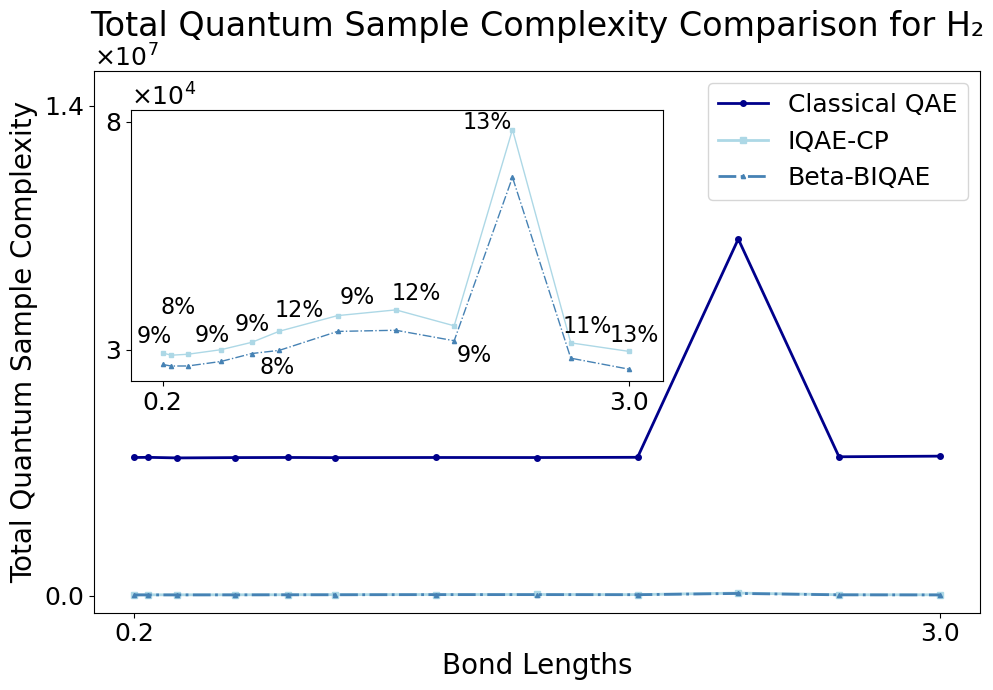

In [18]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# Create main figure
fig, ax = plt.subplots(figsize=(10, 7))

# Plot three curves
ax.plot(df['BL'], df['Naive (total_sc)'], label='Classical QAE', marker='o', color='#00008b', linewidth=2, markersize=4)
ax.plot(df['BL'], df['IAE without Bayesian (total_sc)'], label='IQAE-CP', marker='s', color='#add8e6', linewidth=2, markersize=4)
ax.plot(df['BL'], df['IAE with Bayesian (total_sc)'], label='Beta-BIQAE', marker='^', color='#4682b4', linestyle='-.', linewidth=2, markersize=3)

# Set title and axis label font sizes
ax.set_xlabel('Bond Lengths', fontsize=20)
ax.set_ylabel('Total Quantum Sample Complexity', fontsize=20)
ax.set_title('Total Quantum Sample Complexity Comparison for H₂', fontsize=24)

# Set legend font size
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), fontsize=18)

# Create inset
ax_inset = inset_axes(ax, width="100%", height="100%", loc="upper right",
                      bbox_to_anchor=(0.05, 0.44, 0.6, 0.5), bbox_transform=ax.transAxes)

ax_inset.plot(df['BL'], df['IAE without Bayesian (total_sc)'], label='IQAE-CP', marker='s', color='#add8e6', linewidth=1, markersize=3)
ax_inset.plot(df['BL'], df['IAE with Bayesian (total_sc)'], label='Beta-BIQAE', marker='^', color='#4682b4', linestyle='-.', linewidth=1, markersize=3)

# Adjust limits
ax_inset.set_xlim([ax_inset.get_xlim()[0] - 0.05, ax_inset.get_xlim()[1] * 1.02])
ax_inset.set_ylim([ax_inset.get_ylim()[0] - 0.05, ax_inset.get_ylim()[1] * 1.02])

# Main plot ticks and font
ax.set_xticks([df['BL'].iloc[0], np.float64(3)])
ax.set_yticks([np.float64(0.0), np.float64(1.4e7)])
ax.set_ylim(top=1.5*10**7)
ax.tick_params(axis='both', labelsize=18)

# Inset plot ticks and font
ax_inset.set_yticks([np.float64(3e4), np.float64(8e4)])
ax_inset.set_xticks([np.float64(0.2), np.float64(3.0)])
ax_inset.tick_params(axis='both', labelsize=18)

# Axis format
ax_inset.yaxis.tick_left()
ax_inset.yaxis.set_label_position("left")
ax_inset.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax_inset.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

ax.yaxis.offsetText.set_fontsize(18)
ax_inset.yaxis.offsetText.set_fontsize(18)

# Annotate improvements
x_offsets = [-0.05, 0.04, 0.15, 0.19, 0.15, 0.12, 0.12, 0.12, 0.12, -0.15, 0.1, 0.03]
y_offsets = [1e3, 8e3, 1.5e3, 3e3, -8e3, 2e3, 1.5e3, 1e3, -9e3, -1e3, 1e3, 1e3]

for i, (x, y, improvement) in enumerate(zip(df['BL'], df['IAE without Bayesian (total_sc)'], improvement_percentages)):
    ax_inset.text(x + x_offsets[i], y + y_offsets[i], f"{improvement:.0f}%", 
                  ha='center', va='bottom', fontsize=16)

# Main plot Y axis scientific notation format
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Save and show
plt.tight_layout()
plt.savefig('total_sc.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


### 2 Plot the Estimated Curves

In [19]:
# Loading the CSV file
df_curve = pd.read_csv('../../exact_curve/exact_curve.csv')

# Calculating the Total Energy
df_curve['TE'] = df_curve['NRE'] + df_curve['EE']

In [20]:
# Perform exact match
df_merged = df.merge(df_curve[['BL', 'NRE']], on='BL', how='left')

# Check which rows have missing NRE values and need interpolation
mask = df_merged['NRE'].isna()

# Prepare for interpolation
# Extract BL and NRE from df_curve
x = df_curve['BL']
y = df_curve['NRE']

# Interpolate NRE values for the BLs that are missing NRE in df
interpolated_nre = np.interp(df_merged.loc[mask, 'BL'], x, y)

# Fill in the interpolated results
df_merged.loc[mask, 'NRE'] = interpolated_nre


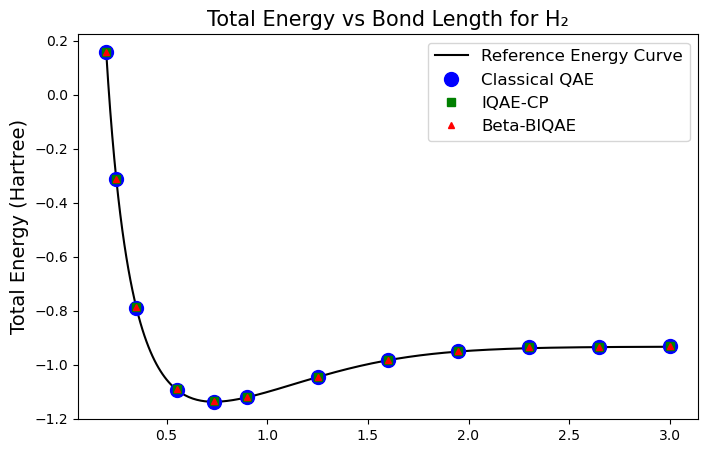

In [21]:
# For optim res
spline_optim_res = InterpolatedUnivariateSpline(df_merged['BL'], df_merged['optim_fun'] + df_merged['NRE'], k=4)  # Quartic spline (k=4)

optim_res = spline_optim_res(df_curve['BL'])

# Create a figure with a specified size
plt.figure(figsize=(8, 5))  # Width = 10 inches, height = 6 inches

# Plot the Total Energy curve
plt.plot(df_curve['BL'], df_curve['TE'], label='Reference Energy Curve', color='black')
# plt.plot(df_curve['BL'], optim_res, label='Optimization Result', color='purple', zorder=5, linewidth=0.8)

# Plot the Classical QAE approach, IQAE, and Bayesian IQAE as dots
plt.plot(df_merged['BL'], df_merged['Naive (est)'] + df_merged['NRE'],
         label='Classical QAE', marker='o', color='blue', linestyle='None', markersize=10)

plt.plot(df_merged['BL'], df_merged['IAE without Bayesian (est)'] + df_merged['NRE'],
         label='IQAE-CP', marker='s', color='green', linestyle='None', markersize=6)

plt.plot(df_merged['BL'], df_merged['IAE with Bayesian (est)'] + df_merged['NRE'],
         label='Beta-BIQAE', marker='^', color='red', linestyle='None', markersize=4)

# Add labels and legend
#plt.xlabel('Bond Length (Å)', fontsize=12)
plt.ylabel('Total Energy (Hartree)', fontsize=14)
plt.title('Total Energy vs Bond Length for H₂', fontsize=15)
plt.legend(fontsize=12)

#plt.ylim(-98.8, -97.8)

# Save the figure
plt.savefig('justify_acc.png', format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### 3 Comparison of Accuracies with Fixed Sample Complexity

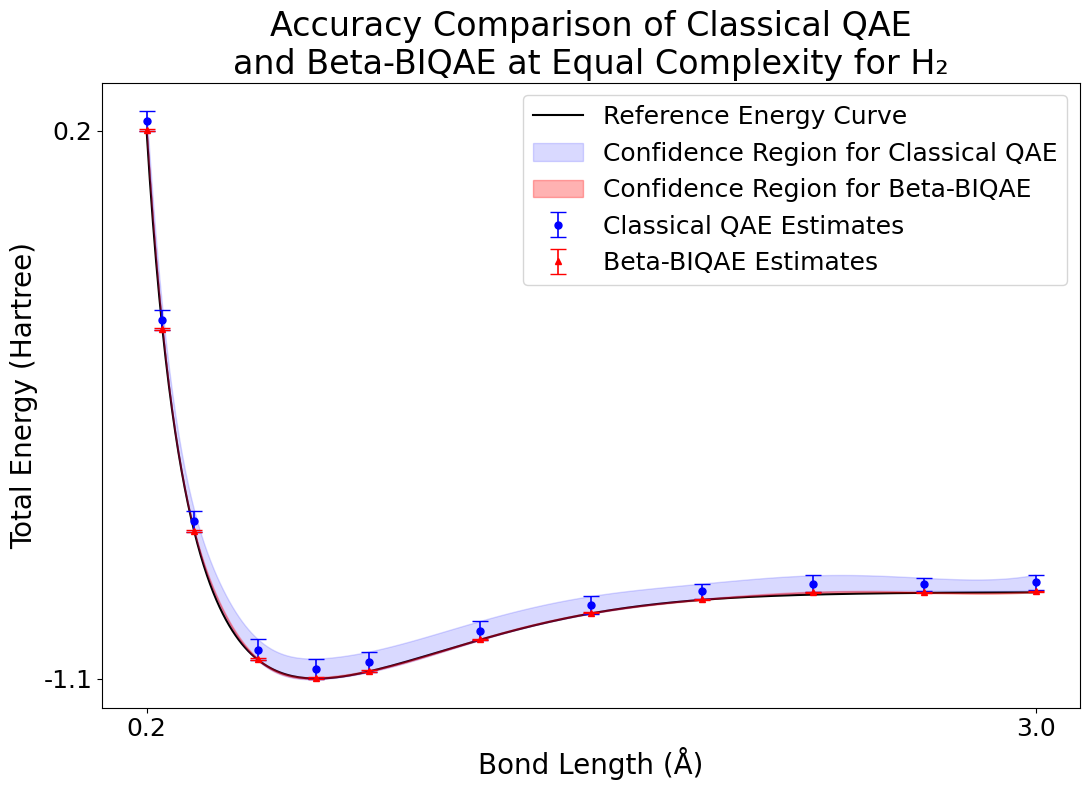

In [22]:
from matplotlib.ticker import FormatStrFormatter
# Create spline functions for the estimates and their error bounds
spline_naive_est = InterpolatedUnivariateSpline(df_merged['BL'], df_merged['Naive_fixed_shots (est)'] + df_merged['NRE'], k=4)
spline_naive_err = InterpolatedUnivariateSpline(df_merged['BL'], df_merged['Naive_fixed_shots (err_bound)'], k=4)
spline_bayes_est = InterpolatedUnivariateSpline(df_merged['BL'], df_merged['IAE with Bayesian (est)'] + df_merged['NRE'], k=4)
spline_bayes_err = InterpolatedUnivariateSpline(df_merged['BL'], df_merged['IAE with Bayesian (err_bound)'], k=4)

# Create the figure and axis object
fig, ax = plt.subplots(figsize=(11, 8))  # Slightly larger canvas

# For Naive
naive_est = spline_naive_est(df_curve['BL'])
naive_upper = naive_est + spline_naive_err(df_curve['BL'])
naive_lower = naive_est - spline_naive_err(df_curve['BL'])

# For Bayesian
bayes_est = spline_bayes_est(df_curve['BL'])
bayes_upper = bayes_est + spline_bayes_err(df_curve['BL'])
bayes_lower = bayes_est - spline_bayes_err(df_curve['BL'])

# Plot the reference curve
ax.plot(df_curve['BL'], df_curve['TE'], label='Reference Energy Curve', color='black', zorder=1)

# Confidence regions
ax.fill_between(df_curve['BL'], naive_lower, naive_upper, color='blue', alpha=0.15,
                label='Confidence Region for Classical QAE', zorder=2)
ax.fill_between(df_curve['BL'], bayes_lower, bayes_upper, color='red', alpha=0.30,
                label='Confidence Region for Beta-BIQAE', zorder=3)

# Error bars for estimates
ax.errorbar(df_merged['BL'], df_merged['Naive_fixed_shots (est)'] + df_merged['NRE'],
            yerr=df_merged['Naive_fixed_shots (err_bound)'],
            fmt='o', label='Classical QAE Estimates', color='blue',
            capsize=6, ecolor='blue', elinewidth=1.2, markersize=5, zorder=4)

ax.errorbar(df_merged['BL'], df_merged['IAE with Bayesian (est)'] + df_merged['NRE'],
            yerr=df_merged['IAE with Bayesian (err_bound)'],
            fmt='^', label='Beta-BIQAE Estimates', color='red',
            capsize=6, ecolor='red', elinewidth=1.2, markersize=5, zorder=5)

# Title (split in two lines)
ax.set_title('Accuracy Comparison of Classical QAE\nand Beta-BIQAE at Equal Complexity for H₂', fontsize=24)

# Axis labels
ax.set_xlabel('Bond Length (Å)', fontsize=20)
ax.set_ylabel('Total Energy (Hartree)', fontsize=20)

# Ticks — only min and max values
ax.set_xticks([df_curve['BL'].min(), df_curve['BL'].max()])
ax.set_yticks([df_curve['TE'].min(), df_curve['TE'].max()])

# Format y-axis tick labels to 1 decimal place
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Tick label font sizes
ax.tick_params(axis='both', labelsize=18)

# Legend
ax.legend(loc='upper right', fontsize=18)

# Save and show
plt.tight_layout()
plt.savefig('compare_acc.png', dpi=300, bbox_inches='tight')
plt.show()

### 4 Estimates at the Equilibrium Bond Length

In [23]:
equi_row = df_merged[abs(df_merged['BL'] - 0.735) < 0.00001]

numpy_value = (df_curve.loc[abs(df_curve['BL'] - 0.73) < 0.00001, 'TE'].iloc[0] + df_curve.loc[abs(df_curve['BL'] - 0.74) < 0.00001, 'TE'].iloc[0]) / 2
print(f"Numpy: {numpy_value:.3f}")
print(f"Minimization: {-1.8572100255519253 + equi_row['NRE'].iloc[0]:.3f}")
print(f"Classical QAE approach: ${equi_row['Naive (est)'].iloc[0] + equi_row['NRE'].iloc[0]:.3f} \\pm {equi_row['Naive (err_bound)'].iloc[0]:.3f}$")
print(f"Classical QAE approach: ${equi_row['IAE without Bayesian (est)'].iloc[0] + equi_row['NRE'].iloc[0]:.3f} \\pm {equi_row['IAE without Bayesian (err_bound)'].iloc[0]:.3f}$")
print(f"Classical QAE approach: ${equi_row['IAE with Bayesian (est)'].iloc[0] + equi_row['NRE'].iloc[0]:.3f} \\pm {equi_row['IAE with Bayesian (err_bound)'].iloc[0]:.3f}$")

print("Average multiplicative improvement is: ",sum((naive_upper - naive_lower) / (bayes_upper - bayes_lower)) / len(bayes_lower))

Numpy: -1.137
Minimization: -1.137
Classical QAE approach: $-1.137 \pm 0.001$
Classical QAE approach: $-1.136 \pm 0.002$
Classical QAE approach: $-1.136 \pm 0.002$
Average multiplicative improvement is:  14.222047782973272
